In [1]:
import numpy as np
import pandas as pd

#interecting with operating system
import os

#Accuracy measurement
from sklearn.metrics import confusion_matrix

#to shuffle 
from sklearn.utils import shuffle

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Model Module
import tensorflow as tf
#transforamtion of image for Augmentation, Segmentation and Overfitting
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Neural Network Layers (Dropout: to avoid overfitting)
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation

from tensorflow.keras import backend as bk

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adamax, Adagrad

from tensorflow.keras.models import Sequential 


from tqdm import tqdm
import cv2  #openCV

In [2]:
classNames =['cats', 'dogs']
#enumerate counting the iteration and indexing the value in the list starts with 0
classNamesLabels= {classnames: i for i, classnames in enumerate(classNames)}

In [3]:
print("classNames:",classNames)
print("classNumberLabels:", classNamesLabels)
print("Length of classNumberLabels:", len(classNamesLabels))

classNames: ['cats', 'dogs']
classNumberLabels: {'cats': 0, 'dogs': 1}
Length of classNumberLabels: 2


**Import File using cv2**

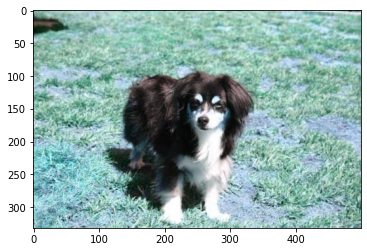

In [4]:
imageLocation ="../input/cat-and-dogs/dataset/training_set/dogs/dog.20.jpg"
imageData=cv2.imread(imageLocation)
plt.imshow(imageData)
plt.show()

**Home Task--01 Splitting the file_name to find specific class**

In [5]:
file_name ="../input/cat-and-dogs/dataset/training_set/dogs/dog.20.jpg"
print("To call only the file name:",'\n', file_name.split('/')[4])
print("Only the respective class of image:", '\n', file_name.split('/')[4].split('.')[0])

To call only the file name: 
 training_set
Only the respective class of image: 
 training_set


In [6]:
imageData.shape

(332, 500, 3)

In [7]:
#to reshape the image 
image_shape = (96,96)

In [8]:
def datasetLoaderFromDirectory():
    #Load Dataset from Folder
    dataset_path = ["../input/cat-and-dogs/dataset/training_set/", "../input/cat-and-dogs/dataset/test_set/"]
    #store data into a list for respective path
    imageDataOutput=[]
    #tag each data path file
    for i in dataset_path:
        #List for Image Data
        images=[]
        labels=[]
        print("Counting : {}".format(i))
        #for directory path
        for j in os.listdir(i):
            
            label = classNamesLabels[j]
            
            for imageDataFile in tqdm(os.listdir(os.path.join(i, j))):
                    imagePath=os.path.join(os.path.join(i,j), imageDataFile)
                
                    #image read and preprocessing
                    #BGR-for opencv-imread and RGB-for matplotlib image
                    image = cv2.imread(imagePath)
                    image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image= cv2.resize(image, image_shape)
                
                    images.append(image)
                    labels.append(label)
        #to produce the image as numpy array
        images= np.array(images, dtype = "float64") #depends of OS (32/64)
        labels= np.array(labels, dtype = "float64")
            
            
        imageDataOutput.append((images, labels))
            
    return imageDataOutput
            

In [9]:
#datasetLoaderFromDirectory()

In [10]:
#to shuffle the whole Dataset
#(train_image, train_labesl), (test_image, test_labels) = shuffle(datasetLoaderFromDirectory())

In [11]:
#to unpack the whole Dataset and store it to 4 different variables without shuffle
(train_images, train_labels), (test_images, test_labels) = datasetLoaderFromDirectory()

Counting : ../input/cat-and-dogs/dataset/training_set/


100%|██████████| 4000/4000 [00:12<00:00, 315.80it/s]


Counting : ../input/cat-and-dogs/dataset/test_set/


100%|██████████| 1000/1000 [00:02<00:00, 334.13it/s]


In [12]:
#now we will shuffle on train dataset only and magic key word (random_state)
train_images, train_labels = shuffle(train_images, train_labels, random_state = 42)

**To check the image shape and labels of train and test**

In [13]:
print("Train images shape:", train_images.shape)
print("Train images labels shape:", train_labels.shape)

print("Test images shape:", test_images.shape)
print("Test images labels shape:", test_labels.shape)

Train images shape: (8000, 96, 96, 3)
Train images labels shape: (8000,)
Test images shape: (2000, 96, 96, 3)
Test images labels shape: (2000,)


In [14]:
print("train_labels output:", train_labels)
print("test_labels output:", test_labels)

train_labels output: [1. 1. 1. ... 1. 0. 0.]
test_labels output: [1. 1. 1. ... 0. 0. 0.]


In [15]:
#unpack train dataset: total no of label == total no of quantity
#_,: value referencing. There are two variables. But we need to unpack only one variable
_, trainImageInfo = np.unique(train_labels, return_counts = True)
_, testImageInfo = np.unique(test_labels, return_counts = True)

In [16]:
print("Train Image Lab1l Information for 0 Class:", trainImageInfo[0])
print("Train Image Label Information for 1 Class:", trainImageInfo[1])
print("Test Image Lab1l Information for 0 Class1", testImageInfo[0])
print("Test Image Label Information for 1 Class:", testImageInfo[1])

Train Image Lab1l Information for 0 Class: 4000
Train Image Label Information for 1 Class: 4000
Test Image Lab1l Information for 0 Class1 1000
Test Image Label Information for 1 Class: 1000


**Visualization**

In [17]:
#Creating DataFrame for storing IMAGE labels metadata
#uing Dictonary Concept, we need to use {} and it should be classNames for Index

pd.DataFrame({"Train": trainImageInfo,
              "Test": testImageInfo},
               index = classNames)

Train  Test
cats   4000  1000
dogs   4000  1000

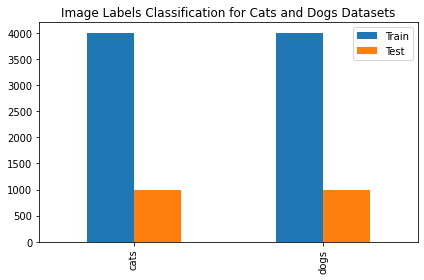

In [18]:
pd.DataFrame({"Train": trainImageInfo,
              "Test": testImageInfo},
               index = classNames).plot.bar()
#plt.plot()
plt.title("Image Labels Classification for Cats and Dogs Datasets")
plt.grid(False)
plt.tight_layout()  #For image adjustment
plt.show()

**Home Task--02
Create a pie chart using bar plot concept**

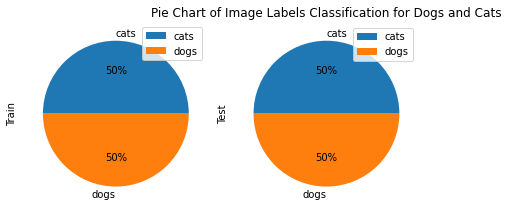

In [19]:
pd.DataFrame({"Train": trainImageInfo,
              "Test": testImageInfo},
               index = classNames).plot.pie(subplots=True,  autopct='%1.0f%%')
plt.title("Pie Chart of Image Labels Classification for Dogs and Cats")
plt.tight_layout()
plt.show()

**To see the Feature Details**

In [20]:
#read one image features
imageFeature=train_images[0] #feature ranges in between 0-255
#no of unique features
print("no of unique features:",len(np.unique(imageFeature)))

print("Array Details of imageFeature:", "\n", imageFeature)

no of unique features: 256
Array Details of imageFeature: 
 [[[ 18.  21.  10.]
  [ 35.  31.  22.]
  [ 54.  41.  35.]
  ...
  [230. 196. 159.]
  [233. 195. 158.]
  [216. 193. 163.]]

 [[ 20.  23.  12.]
  [ 20.  17.   8.]
  [ 27.  19.  12.]
  ...
  [209. 176. 143.]
  [224. 189. 151.]
  [222. 192. 158.]]

 [[ 15.  17.   6.]
  [ 20.  21.  11.]
  [ 24.  23.  13.]
  ...
  [239. 210. 172.]
  [229. 197. 157.]
  [230. 196. 160.]]

 ...

 [[148. 118.  84.]
  [109.  87.  56.]
  [ 66.  55.  42.]
  ...
  [119. 101.  76.]
  [100.  88.  67.]
  [ 93.  79.  60.]]

 [[153. 124.  91.]
  [115.  87.  55.]
  [ 79.  60.  42.]
  ...
  [124. 106.  81.]
  [112.  97.  76.]
  [104.  86.  67.]]

 [[158. 129.  97.]
  [132. 100.  68.]
  [ 86.  63.  40.]
  ...
  [114. 100.  73.]
  [108.  93.  72.]
  [103.  88.  65.]]]


In [21]:
#Scaling the images 
train_images = train_images/255.0
test_images = test_images/255.0

In [22]:
#train_images[0]
print("Values are in between 0 and 1")
np.unique(train_images[0])

Values are in between 0 and 1


array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

In [23]:
print("no of unique features:",len(np.unique(train_images[0])))

no of unique features: 256


In [24]:
print("Numebre of Images, Image_width, Image_Height, Number of Color Channels", train_images.shape)

Numebre of Images, Image_width, Image_Height, Number of Color Channels (8000, 96, 96, 3)


**Random Index Generation of train_images**

In [25]:
print(np.random.randint(train_images.shape[0]))
print(np.random.randint(train_images.shape[0]))
print(np.random.randint(train_images.shape[0]))
print(np.random.randint(train_images.shape[0]))

5053
5190
3307
5207


In [26]:
train_labels[1001]

0.0

In [27]:
#Now read an image after Scalling
def ImageVisualization(classNames, imagePath, imagelabel):
    #create index for indivisual Image and index will be genarated in random order
    #we will identify image using feature metrics
    index= np.random.randint(imagePath.shape[0]) #index is always integers and choose index randomly
    #print(index) #---- to check index float/int(it's int)
    plt.figure() #define frame size
    plt.imshow(imagePath[index])
    
    plt.xticks([]) #X-label positioning
    plt.yticks([])  #Y-label poitioning
    plt.grid(False)
    plt.tight_layout()
    #{} use to pass the index values and + use to concat the label of actual image
    plt.title("Index of this Image is: {}".format(index) + "And Class is: " + classNames[int(imagelabel[index])]) #train_images is float
    plt.show()

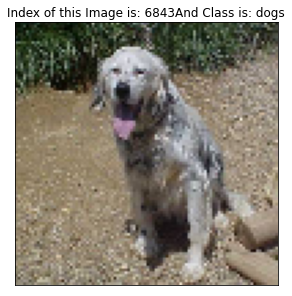

In [28]:
ImageVisualization(classNames, train_images, train_labels)

**Home Task--03 Create function which can plot both Random Class using feature metrics and Actual Class**

In [29]:
#Now read an image after Scalling
def ImageVisualization01(classNames, imagePath, imagelabel, actual_label):
    #create index for indivisual Image and index will be genarated in random order
    #we will identify image using feature metrics
    index= np.random.randint(imagePath.shape[0]) #index is always integers and choose index randomly
    #print(index) #---- to check index float/int(it's int)
    plt.figure() #define frame size
    plt.imshow(imagePath[index])
    
    plt.xticks([]) #X-label positioning
    plt.yticks([])  #Y-label poitioning
    plt.grid(False)
    plt.tight_layout()
    #{} use to pass the index values and + use to concat the label of actual image
    plt.title("Index of this Image is: {}".format(index) + " And Predicted Class is: " 
              + classNames[int(imagelabel[index])]
              + ". Actual  is: " + classNames[int(actual_label[index])]) #train_images is float
    plt.show()

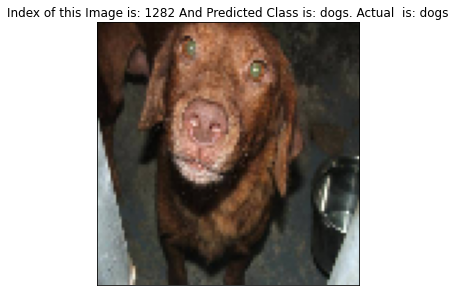

In [30]:
ImageVisualization01(classNames, train_images, train_labels, train_labels)

In [31]:
#Now read an image after Scalling
def ImageVisualization02(classNames, imagePath, imagelabel):
    
    fig = plt.figure(figsize=(15,15)) #frame_size
    fig.suptitle("Random Image Visualization", fontsize =20) #superclass title
    
    for i in range(25):
        plt.subplot(5, 5, i+1) 
        plt.xticks([]) #X-label positioning
        plt.yticks([])  #Y-label poitioning
        plt.grid(False)
        plt.tight_layout()
        
        plt.imshow(imagePath[i], cmap=plt.cm.binary)
       
        #{} use to pass the index values and + use to concat the label of actual image
        plt.xlabel("ClassName: {}".format(classNames[int(imagelabel[i])])) #train_images is float
    plt.show()

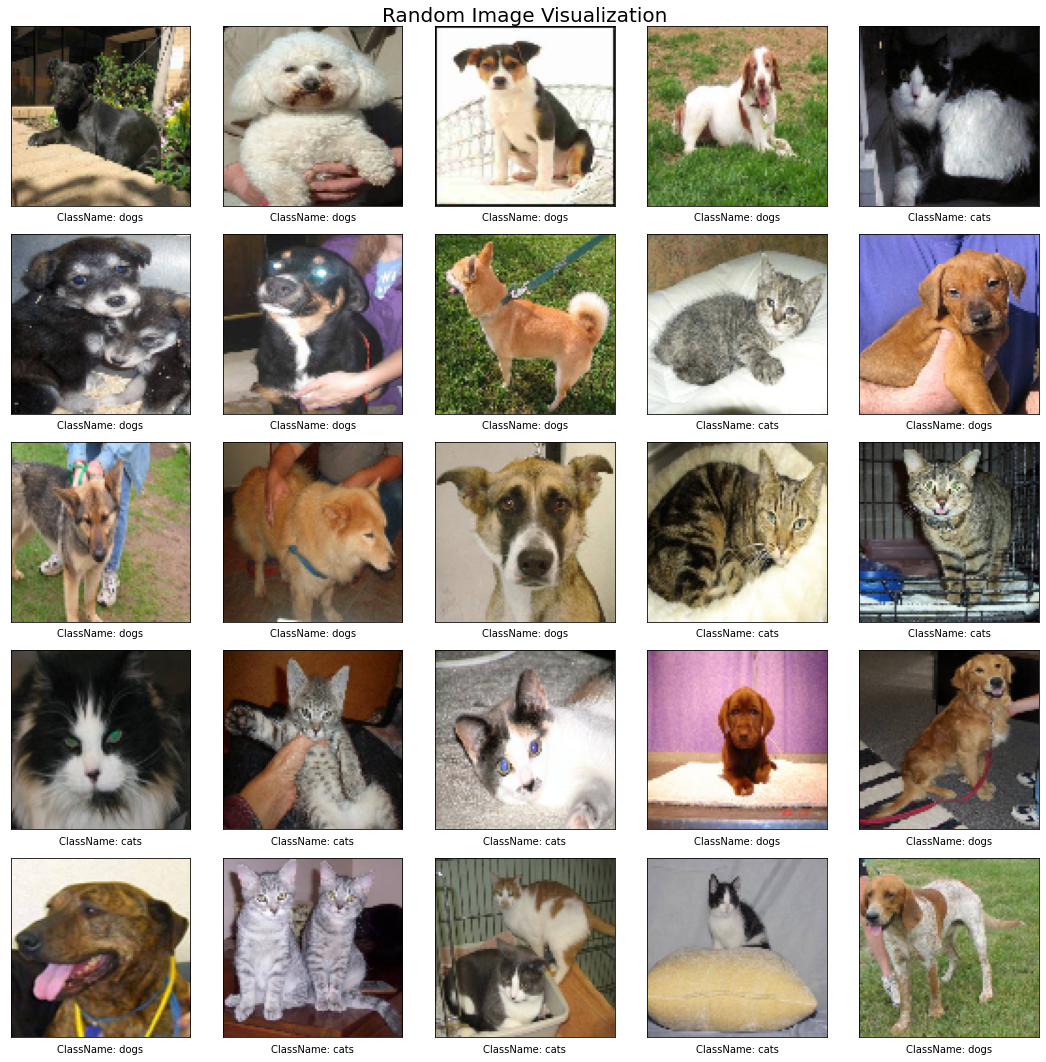

In [32]:
ImageVisualization02(classNames, train_images, train_labels)

**Home Task--04 Visualizing Image at shape (3,3) after scaling**

In [33]:
def ImageVisualization03(classNames, imagePath, imagelabel, actual_label):
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Random Visualization of Image Classes", fontsize=20)
    
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.tight_layout()
        
        plt.imshow(imagePath[i], cmap=plt.cm.binary)
        plt.xlabel("ClassName: {}".format(classNames[int(imagelabel[i])]) + ". Actual  is: " + classNames[int(actual_label[i])])
        

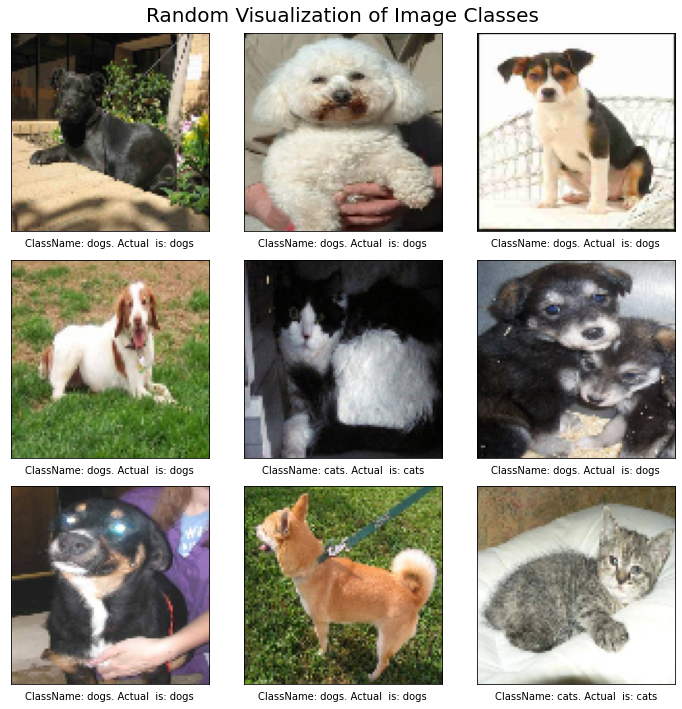

In [34]:
ImageVisualization03(classNames, train_images, train_labels, train_labels)

**Home Task--04 Build CNN model for the supevised image Dataset**

important parameter of CNN
1. input shape 2. Kernal

a. Convoluted Layer b.Kernal Layer c.Connected Layer

In [35]:
model = Sequential([
    #input layer
    Conv2D(64, (3,3), activation ="relu", input_shape =(96,96,3)), #inputs:32, kernal_size=3,3
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    
    #1st hidden layer
    Conv2D(128, (3,3), activation ="relu"), #Dense:32, kernal_size=3,3
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    
    #2nd hidden layer
    Conv2D(196, (3,3), activation ="relu"), #Dense:32, kernal_size=3,3
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    
    #3rd hidden layer
    Conv2D(256, (3,3), activation ="relu"), #Dense:32, kernal_size=3,3
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),


    #Flattten layer (1D)
    Flatten(),
    
    #Connected layer
    Dense(256, activation = "relu"),
    Dense(2, activation = "softmax") #2 classes Dogs and Cats
    
])

2022-08-16 12:55:13.447590: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-16 12:55:13.456013: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-16 12:55:13.456760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-16 12:55:13.458184: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 196)       225988    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 196)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         4

**Compile the model**

Three important parameters to compile (Optimizer, loss, accuracy)

Adam = most commonly used, perform well for all models and safest

Loss = sparse_categorical_crossentropy for softmax is better and for sigmoid, binary_crossentropy/categorial_crossentropy

In [37]:
model.compile(optimizer = 'adam',
              loss = "sparse_categorical_crossentropy",
              metrics =['accuracy'])

In [38]:
modelData = model.fit(train_images,
                     train_labels,
                      epochs = 15,
                     batch_size = 128,
                     validation_split=0.2)

2022-08-16 12:55:14.695144: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 707788800 exceeds 10% of free system memory.
2022-08-16 12:55:15.491070: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 707788800 exceeds 10% of free system memory.
2022-08-16 12:55:16.073398: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-08-16 12:55:16.883003: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


50/50 [==============================] - 5s 58ms/step - loss: 0.7138 - accuracy: 0.5028 - val_loss: 0.6921 - val_accuracy: 0.5531
Epoch 2/15
50/50 [==============================] - 2s 42ms/step - loss: 0.6851 - accuracy: 0.5483 - val_loss: 0.6765 - val_accuracy: 0.5844
Epoch 3/15
50/50 [==============================] - 2s 42ms/step - loss: 0.6636 - accuracy: 0.6091 - val_loss: 0.6446 - val_accuracy: 0.6225
Epoch 4/15
50/50 [==============================] - 2s 42ms/step - loss: 0.6341 - accuracy: 0.6494 - val_loss: 0.6497 - val_accuracy: 0.6363
Epoch 5/15
50/50 [==============================] - 2s 43ms/step - loss: 0.5736 - accuracy: 0.6992 - val_loss: 0.5620 - val_accuracy: 0.7100
Epoch 6/15
50/50 [==============================] - 2s 42ms/step - loss: 0.5345 - accuracy: 0.7262 - val_loss: 0.5841 - val_accuracy: 0.6806
Epoch 7/15
50/50 [==============================] - 2s 42ms/step - loss: 0.5027 - accuracy: 0.7536 - val_loss: 0.5286 - val_accuracy: 0.7456
Epoch 8/15
50/50 [======

In [39]:
def accuracy_and_loss_Plot(modelData):
    
    fig = plt.figure(figsize = (10, 10))
    
    plt.subplot(221)
    plt.plot(modelData.history["accuracy"], 'bo--', label = 'accuracy')
    plt.plot(modelData.history["val_accuracy"], 'ro--', label = 'val_accuracy')
    plt.title("Training Data Accuracy Measurement")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy Information")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    
    
    plt.subplot(222)
    plt.plot(modelData.history["loss"], 'bo--', label = 'loss')
    plt.plot(modelData.history["val_loss"], 'ro--', label = 'val_loss')
    plt.title("Training Data Loss Measurement")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss Information")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.show()

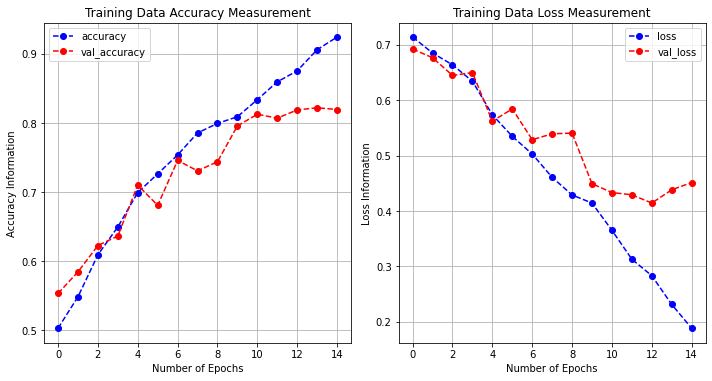

In [40]:
accuracy_and_loss_Plot(modelData)

In [41]:
testloss=model.evaluate(test_images, test_labels)

63/63 [==============================] - 1s 6ms/step - loss: 0.4380 - accuracy: 0.8225


**Image Prediction**

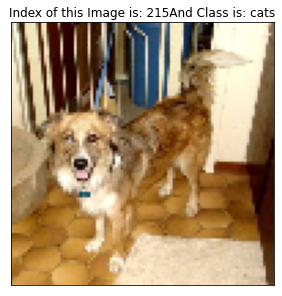

In [42]:
predictedData = model.predict(test_images)
predictedDataLabels = np.argmax(predictedData, axis = 1)
ImageVisualization(classNames, test_images, predictedDataLabels)

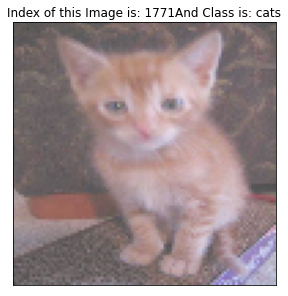

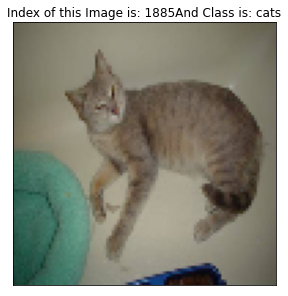

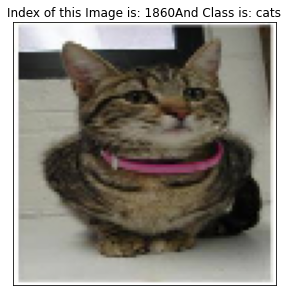

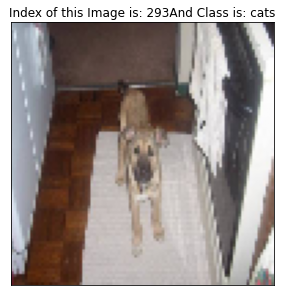

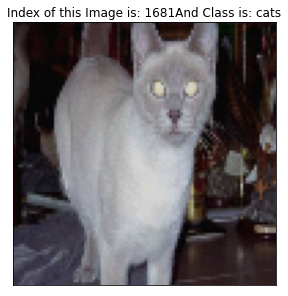

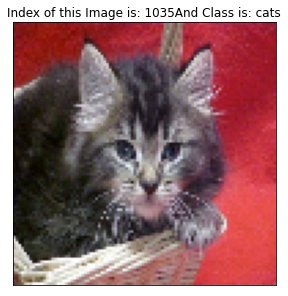

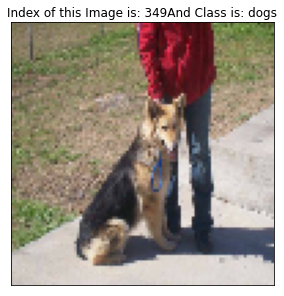

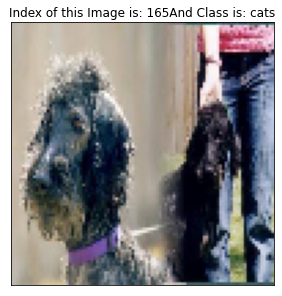

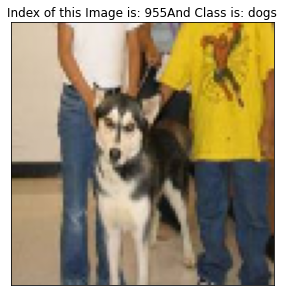

In [43]:
for i in range(1, 10):
    ImageVisualization(classNames, test_images, predictedDataLabels)

**Home Task--05 Compare Pridected and Actual Class Name**

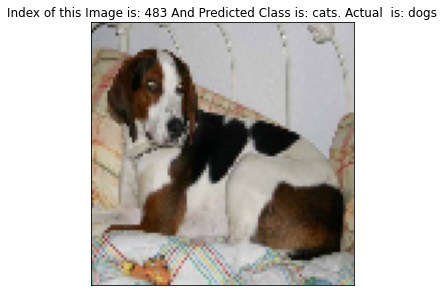

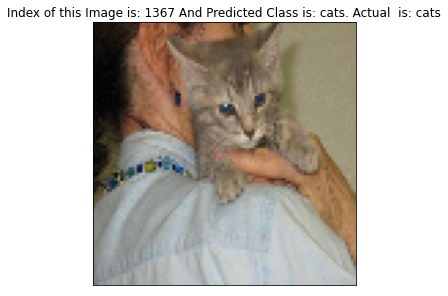

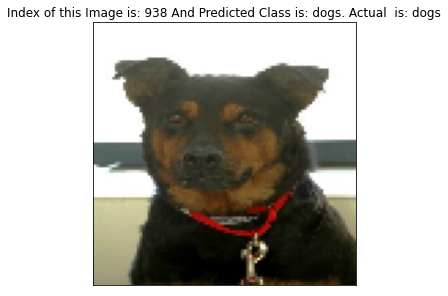

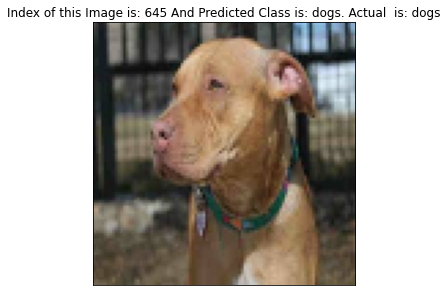

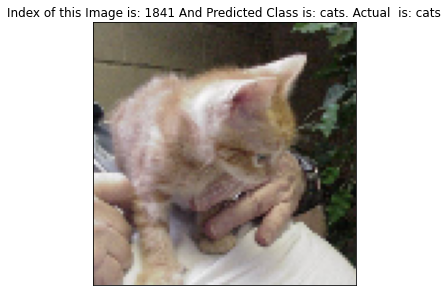

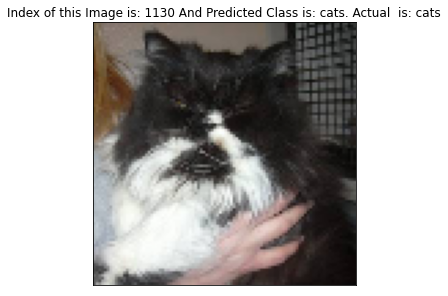

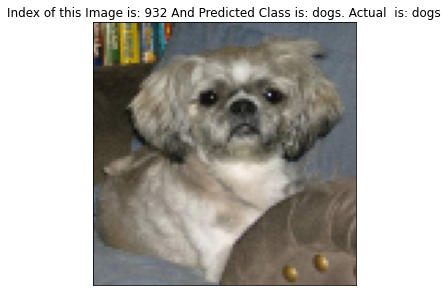

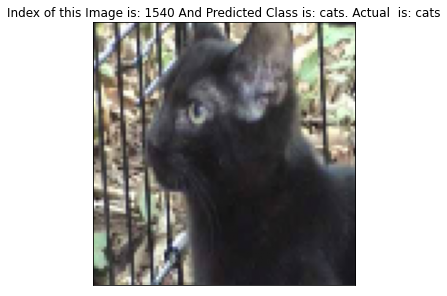

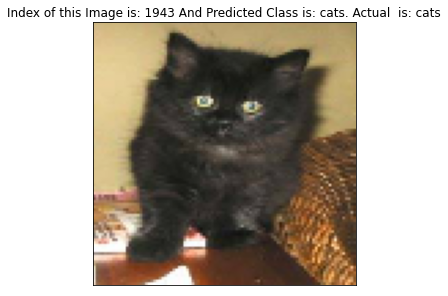

In [48]:
#Predicted vs Test Class
for i in range(1,10):
    ImageVisualization01(classNames, test_images, predictedDataLabels, test_labels)

**Home Task--06 To solve out of range issue**

In [49]:
def missClassification(classNames, ImageData, ImageLabels, predictedDataLabels):
    
    result = (ImageLabels == predictedDataLabels)
    #print(result)
    missClass = np.where(result == 0)
    #print(missClass)
    missClassImage = imageData[missClass]
    missClasslabels = predictedDataLabels[missClass]
    
    print("Miss Classification Image Data is: ")
    ImageVisualization02(classNames, missClassImage, missClasslabels)

In [50]:
missClassification(classNames, test_images, test_labels, predictedDataLabels) 

IndexError: index 338 is out of bounds for axis 0 with size 332

**Confusion Metrics**

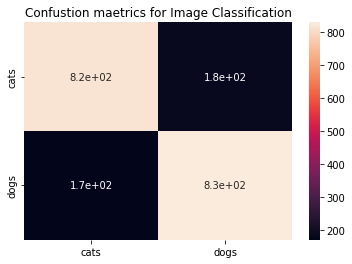

In [51]:
Cm = confusion_matrix(test_labels, predictedDataLabels)
ax = plt.axes()
sns.heatmap(Cm, annot=True, 
           annot_kws={'size':10}, 
           xticklabels=classNames,
           yticklabels=classNames, 
           ax = ax)

plt.title("Confustion maetrics for Image Classification")
plt.show()